In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("Classified Data",index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sl=StandardScaler()

In [9]:
sl.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_vlaues=sl.transform(df.drop("TARGET CLASS",axis=1))

In [11]:
scaled_vlaues

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
df1=pd.DataFrame(scaled_vlaues,columns=df.columns[:-1])

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X=df1
y=df["TARGET CLASS"]

In [18]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
predict=knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.90      0.87      0.89       358
          1       0.87      0.90      0.89       342

avg / total       0.89      0.89      0.89       700



In [31]:
print(confusion_matrix(y_test,predict))

[[312  46]
 [ 33 309]]


In [32]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    error.append(np.mean(predict != y_test))

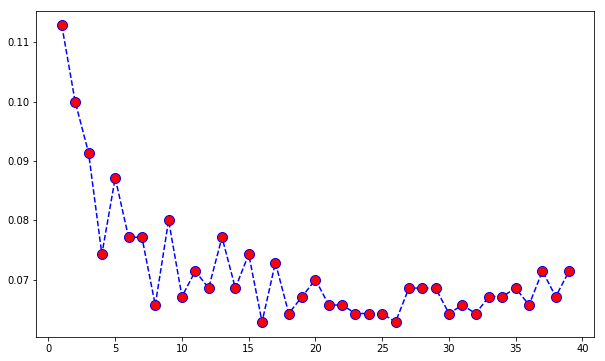

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [40]:
import matplotlib.pyplot as plt

In [73]:
knn=KNeighborsClassifier(n_neighbors=16)

In [74]:
knn.fit(X_train,y_train)
predict=knn.predict(X_test)

In [75]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.95      0.92      0.94       358
          1       0.92      0.95      0.94       342

avg / total       0.94      0.94      0.94       700

